In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from global_var import *
from tools import readinfo, statistics
folder_save = 'C:/SPRUP_data_Jenda/2019_03_13_Jenda_microscopy/jupyter_figures/'

In [2]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Palatino Linotype'
matplotlib.rcParams['mathtext.it'] = 'Palatino Linotype:italic'
matplotlib.rcParams['mathtext.bf'] = 'BiPalatino Linotype:bold'

In [91]:
names = ['x', 'y', 'contrast', '$I_{NP}$', '$I_{NP}/px$', '$I_{BG}$', 'std']
def load_np_data(folder, file):
    main_folder='C:/SPRUP_data_Jenda/2019_03_13_Jenda_microscopy/'
    file = main_folder + folder + '/exports_np/' + file
    info = readinfo(file)
#     info_stat = statistics(info)
    return np.matrix(info)

def histogram(folder, number, legend, i, title = None):
    names = ['x', 'y', 'contrast', '$I_{NP}$', '$I_{NP}/px$', '$I_{BG}$', 'std']
    data = []
    for nm in number:
        data.append(load_np_data(folder, 'raw_{:02.0f}_1'.format(nm))[:, i])
        
    
    fig, ax = plt.subplots()
    ax.set_title('Histogram: ' + names[i])
    ax.set_ylabel('#')
    ax.set_xlabel(names[i])

    bins = 10

    width = (np.max(data[-1]) - np.min(data[-1]))/bins*0.8
    
    j = 0
    for d in data:
        _ = ax.hist(
                d, 
                bins,
                weights=np.zeros_like(d) + 1. / d.size,
                width = width,
                color = COLORS[j],
                alpha = 0.5,
                label = legend[j]
                )
        j += 1 
       
    lgd = fig.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
    if title is not None:
        fig.savefig(folder_save + 'histogram_' + names[i] + '_' + title + '.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    

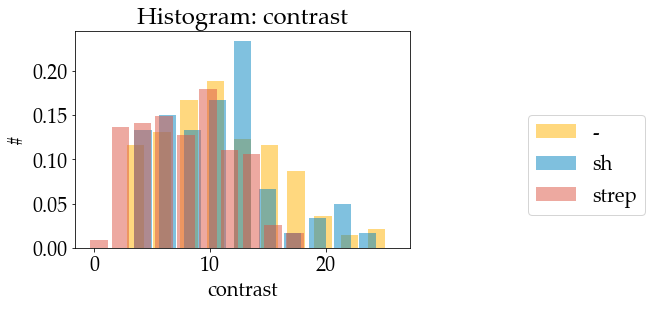

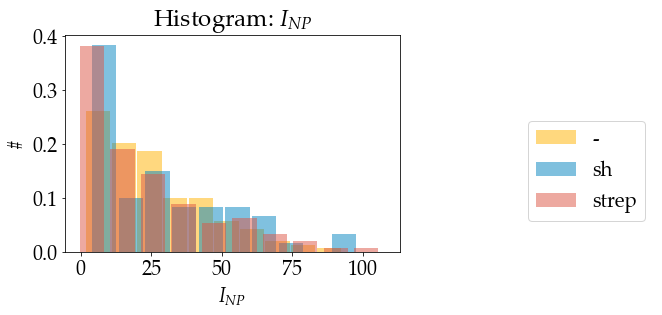

In [92]:
histogram('20_04_20_Q4', [2, 15, 17], ['-', 'sh', 'strep'], 2)
histogram('20_04_20_Q4', [2, 15, 17], ['-', 'sh', 'strep'], 3)

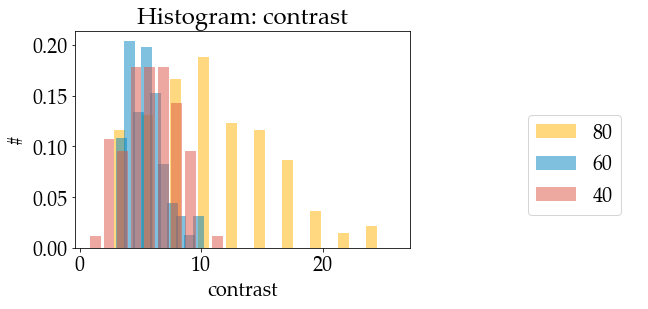

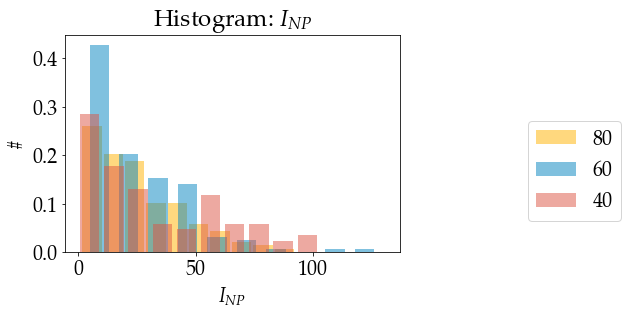

In [93]:
histogram('20_04_20_Q4', [2, 25, 10], [80, 60, 40], 2)
histogram('20_04_20_Q4', [2, 25, 10], [80, 60, 40], 3)

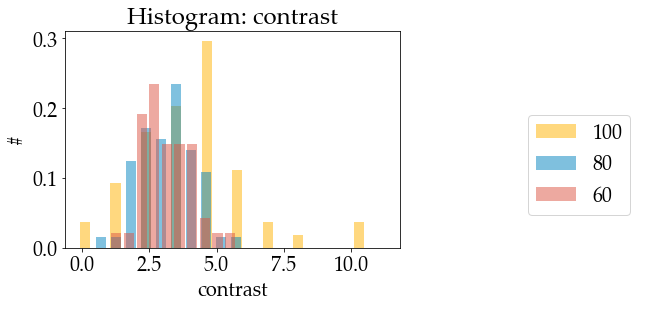

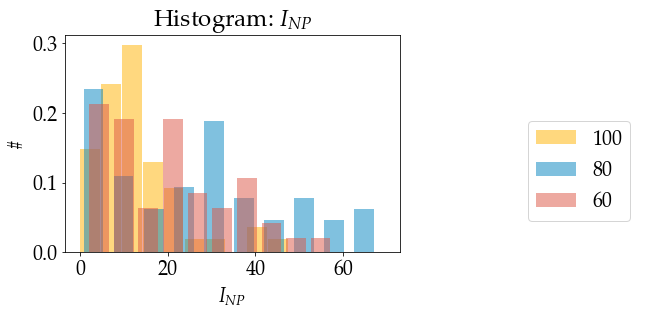

In [99]:
histogram('20_04_15_L3', [31, 5, 19], [100, 80, 60], 2)
histogram('20_04_15_L3', [31, 5, 19], [100, 80, 60], 3)

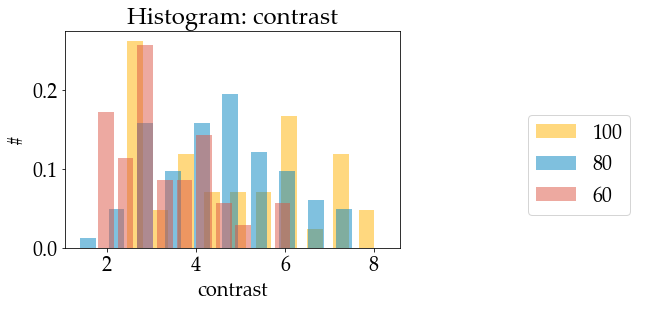

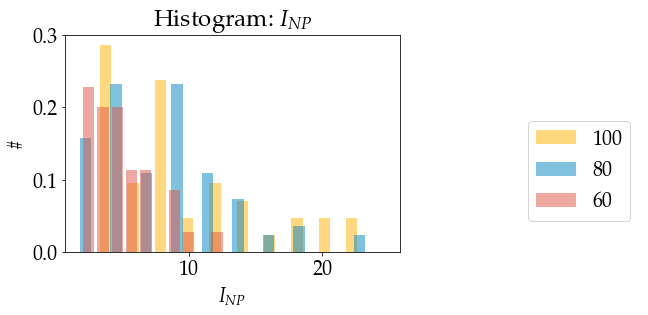

In [98]:
histogram('20_03_16_K4', [27, 6, 16], [100, 80, 60], 2)
histogram('20_03_16_K4', [27, 6, 16], [100, 80, 60], 3)